# CASE STUDY 2: REAL ESTATE PRICE PREDICTION (REGRESSION)

Dataset: `house_price_data.csv`

# Task 1: Data Loading and Exploration

In [ ]:
import pandas as pd

# Load dataset
data = pd.read_csv('house_price_data.csv')

# Display basic info
print("Dataset info:")
data.info()

# Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())

# Summary statistics
print("\nSummary statistics:")
print(data.describe())

# Identify outliers using IQR for numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
Q1 = data[numeric_cols].quantile(0.25)
Q3 = data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((data[numeric_cols] < (Q1 - 1.5 * IQR)) | (data[numeric_cols] > (Q3 + 1.5 * IQR))).sum()
print("\nDetected outliers per numeric feature:")
print(outliers)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_id              8000 non-null   object 
 1   neighborhood             8000 non-null   object 
 2   distance_to_city_center  8000 non-null   float64
 3   distance_to_metro        8000 non-null   int64  
 4   distance_to_school       8000 non-null   int64  
 5   crime_rate               8000 non-null   float64
 6   house_age                8000 non-null   int64  
 7   total_area               8000 non-null   int64  
 8   bedrooms                 8000 non-null   int64  
 9   bathrooms                8000 non-null   int64  
 10  floors                   8000 non-null   int64  
 11  garage                   8000 non-null   int64  
 12  garden                   8000 non-null   int64  
 13  basement                 8000 non-null   int64  
 14  balcony   

# TASK 2: Exploratory Data Analysis (EDA)

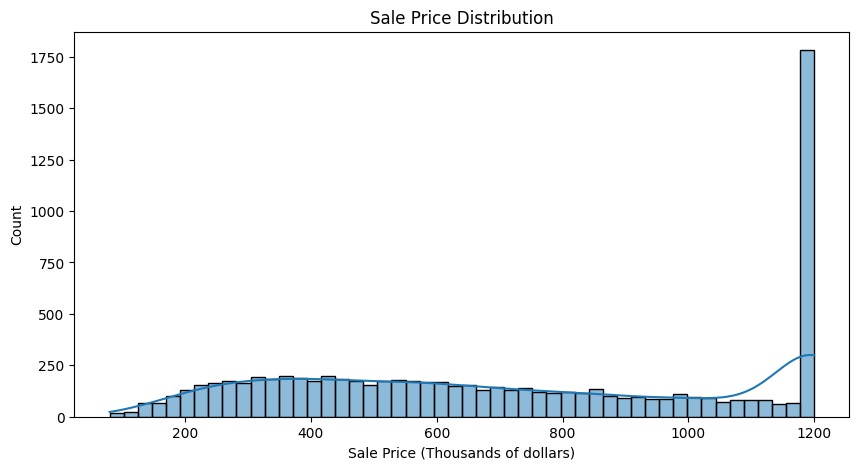

Skewness of sale_price: 0.07


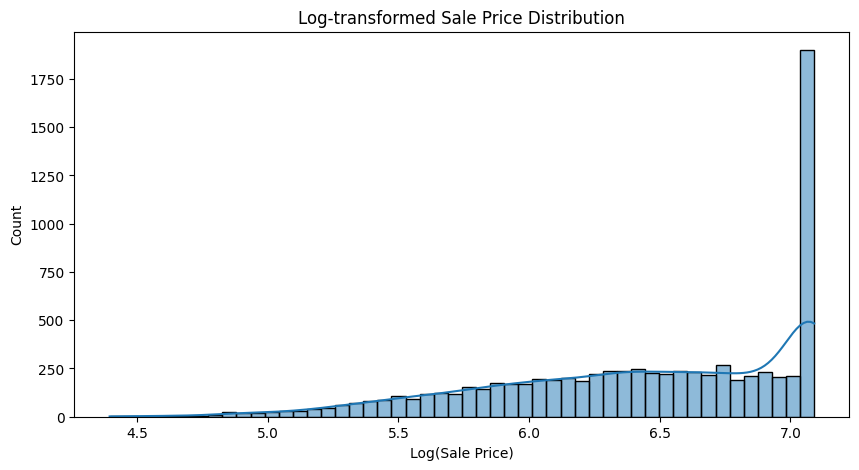

Skewness of log_sale_price: -0.66


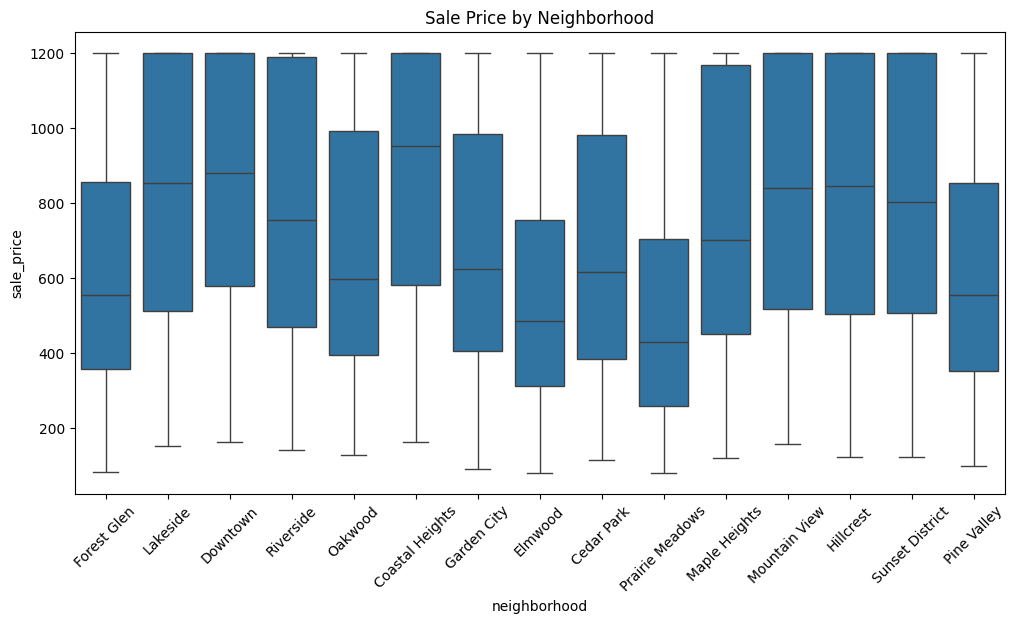

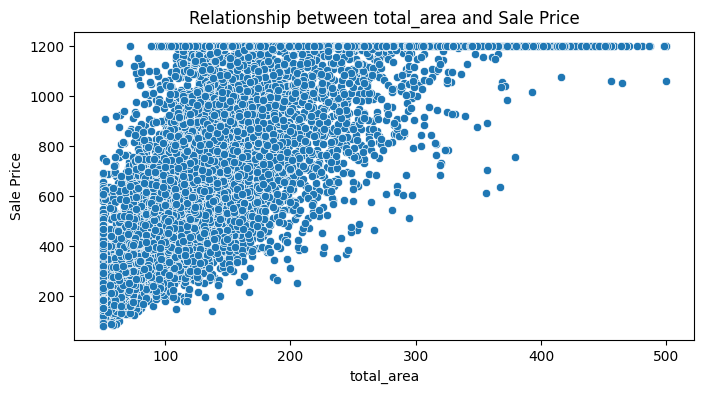

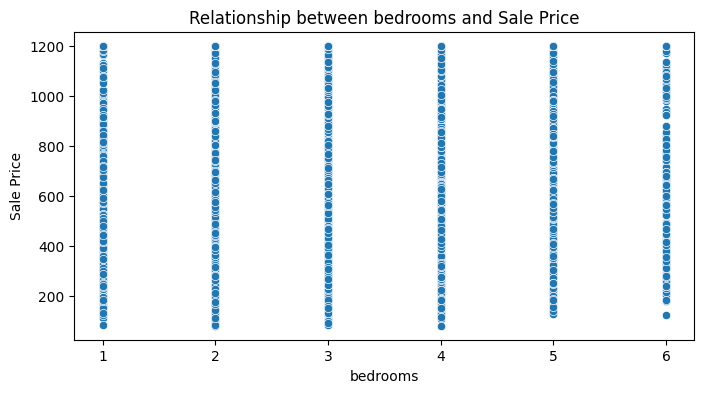

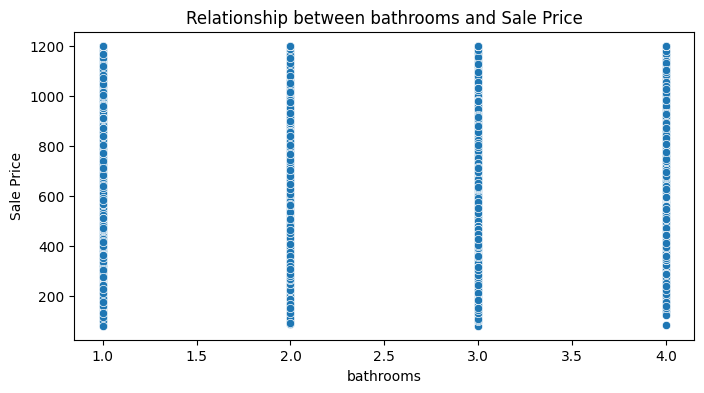

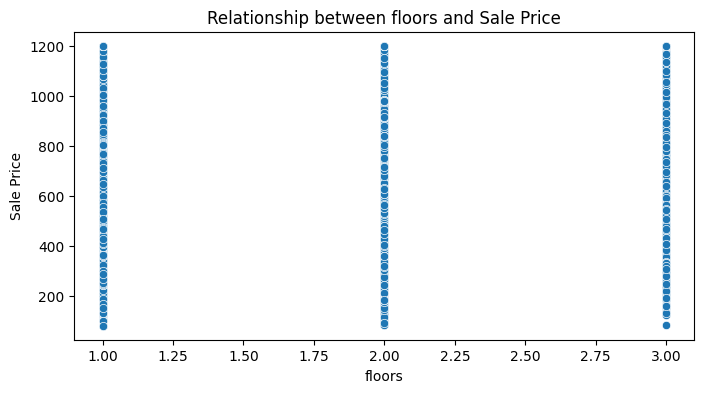

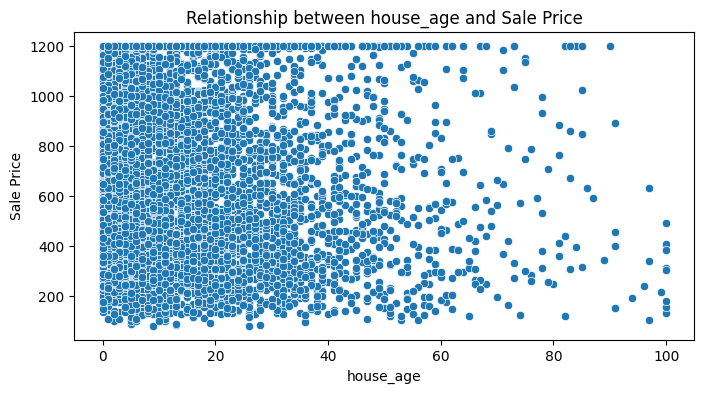

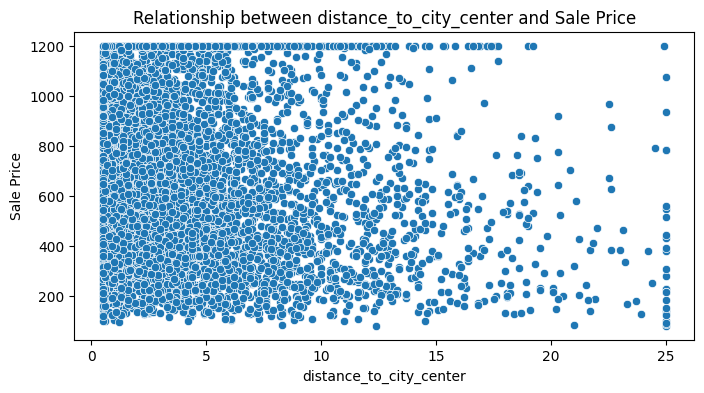

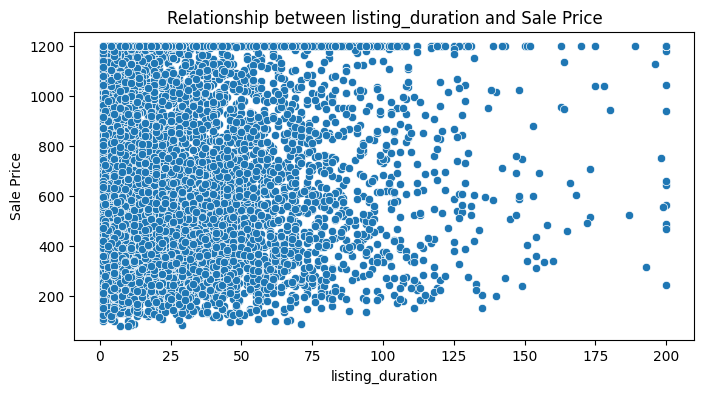

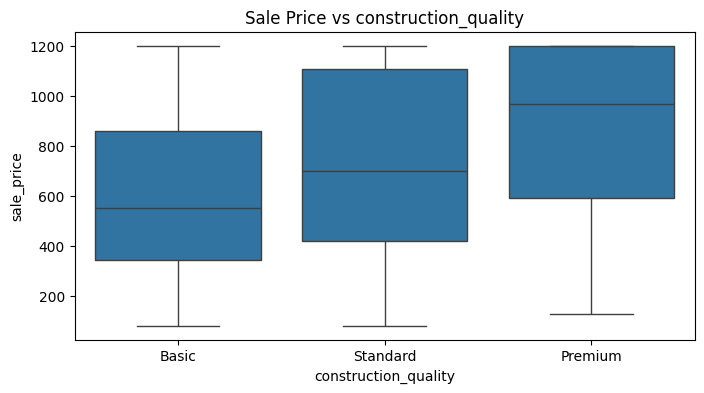

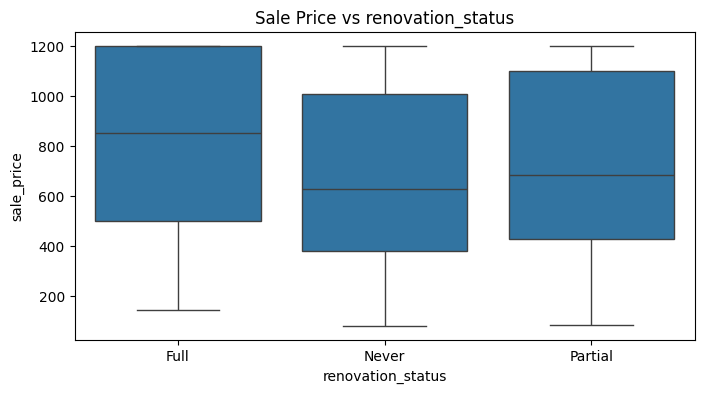

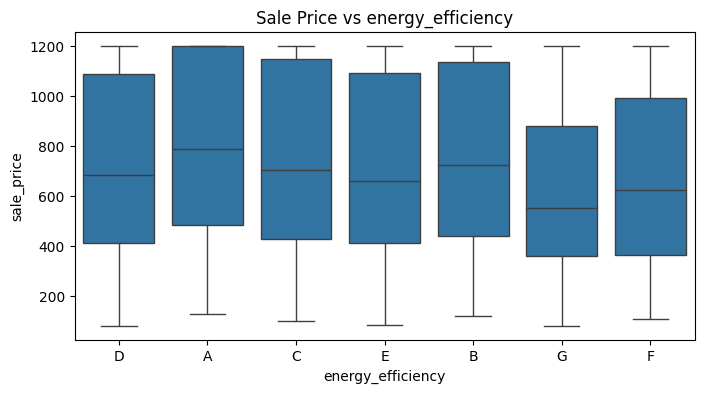

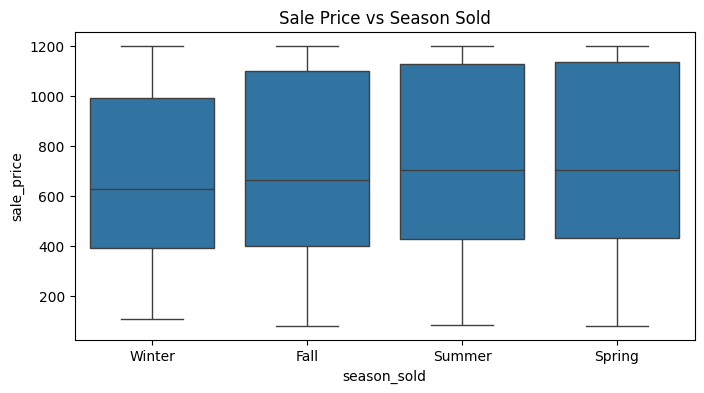

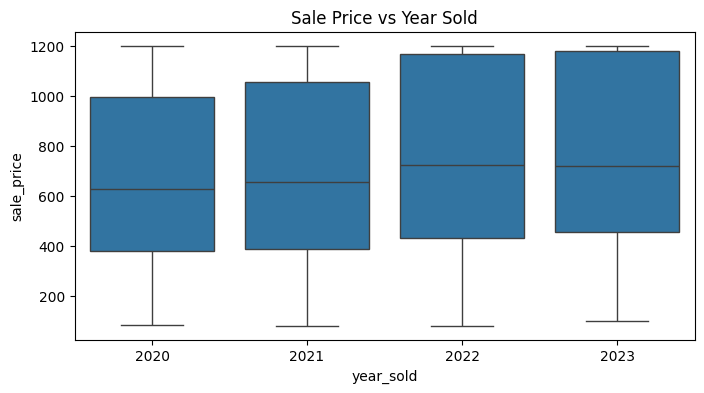

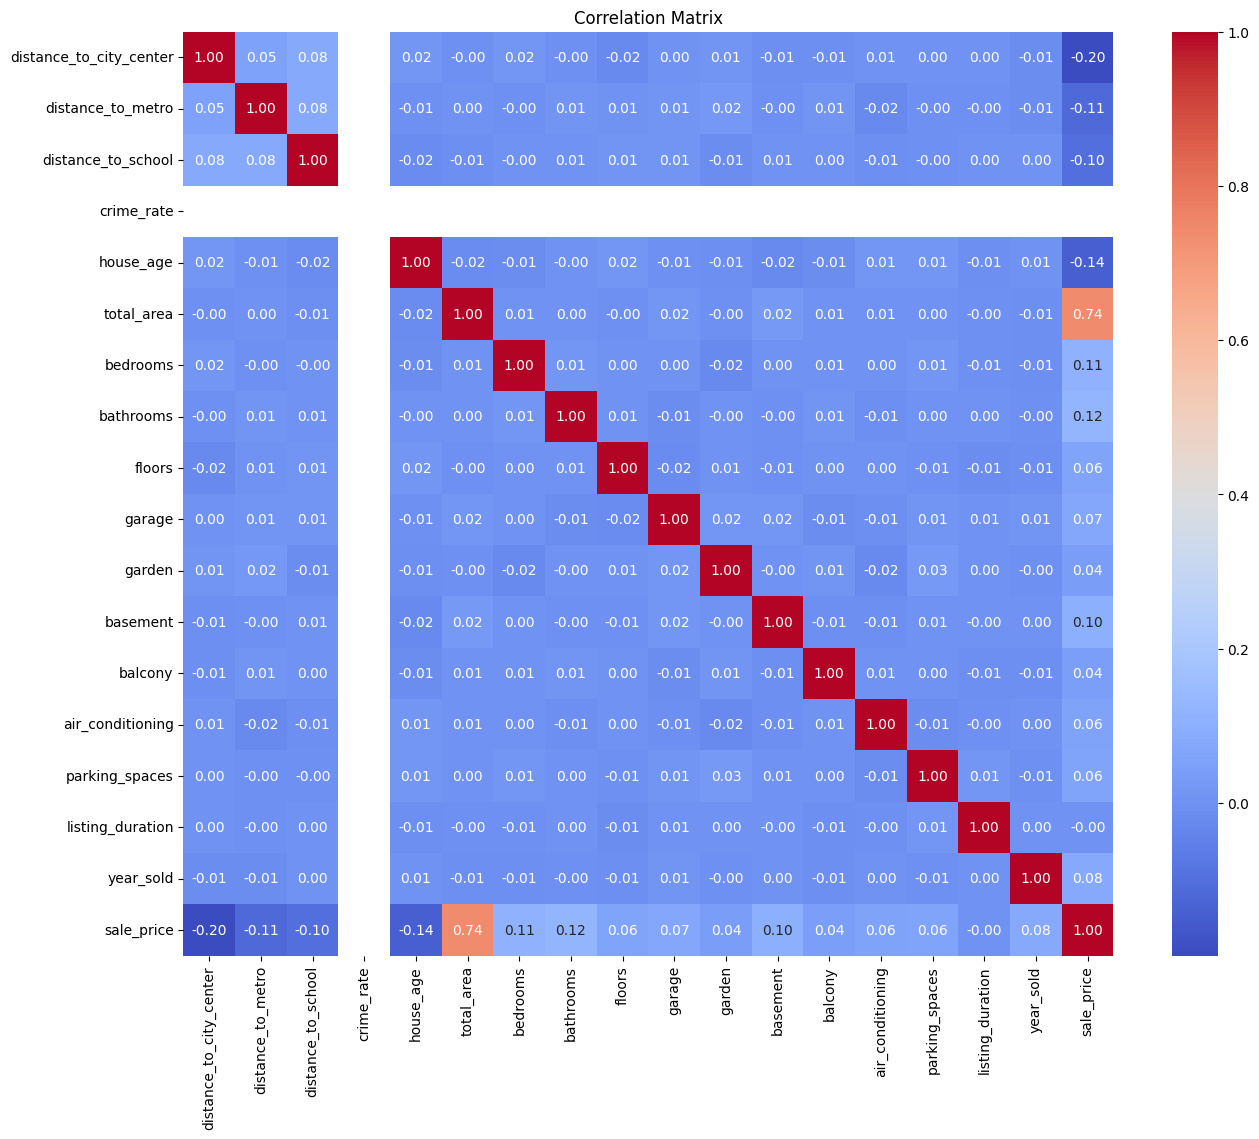

Highly correlated pairs (correlation > 0.8):
Series([], dtype: float64)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sale price distribution and skewness
plt.figure(figsize=(10,5))
sns.histplot(data['sale_price'], kde=True, bins=50)
plt.title('Sale Price Distribution')
plt.xlabel('Sale Price (Thousands of dollars)')
plt.ylabel('Count')
plt.show()

print(f"Skewness of sale_price: {data['sale_price'].skew():.2f}")

# Log-transform sale price to check skewness reduction
data['log_sale_price'] = np.log1p(data['sale_price'])
plt.figure(figsize=(10,5))
sns.histplot(data['log_sale_price'], kde=True, bins=50)
plt.title('Log-transformed Sale Price Distribution')
plt.xlabel('Log(Sale Price)')
plt.ylabel('Count')
plt.show()

print(f"Skewness of log_sale_price: {data['log_sale_price'].skew():.2f}")

# Impact of location (neighborhood) on sale price
plt.figure(figsize=(12,6))
sns.boxplot(x='neighborhood', y='sale_price', data=data)
plt.xticks(rotation=45)
plt.title('Sale Price by Neighborhood')
plt.show()

# Relationships of key numeric features with sale price
selected_features = ['total_area', 'bedrooms', 'bathrooms', 'floors', 'house_age', 'distance_to_city_center', 'listing_duration']
for feature in selected_features:
    plt.figure(figsize=(8,4))
    sns.scatterplot(x=data[feature], y=data['sale_price'])
    plt.title(f'Relationship between {feature} and Sale Price')
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.show()

# Quality indicators vs sale price
quality_features = ['construction_quality', 'renovation_status', 'energy_efficiency']
for feature in quality_features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=feature, y='sale_price', data=data)
    plt.title(f'Sale Price vs {feature}')
    plt.show()

# Market timing (season and year sold)
plt.figure(figsize=(8,4))
sns.boxplot(x='season_sold', y='sale_price', data=data)
plt.title('Sale Price vs Season Sold')
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x='year_sold', y='sale_price', data=data)
plt.title('Sale Price vs Year Sold')
plt.show()

# Correlation matrix and multicollinearity check
corr = data[numeric_cols].corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

# Detect multicollinearity by correlation threshold
high_corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
print("Highly correlated pairs (correlation > 0.8):")
print(high_corr.stack()[high_corr.stack().abs() > 0.8])

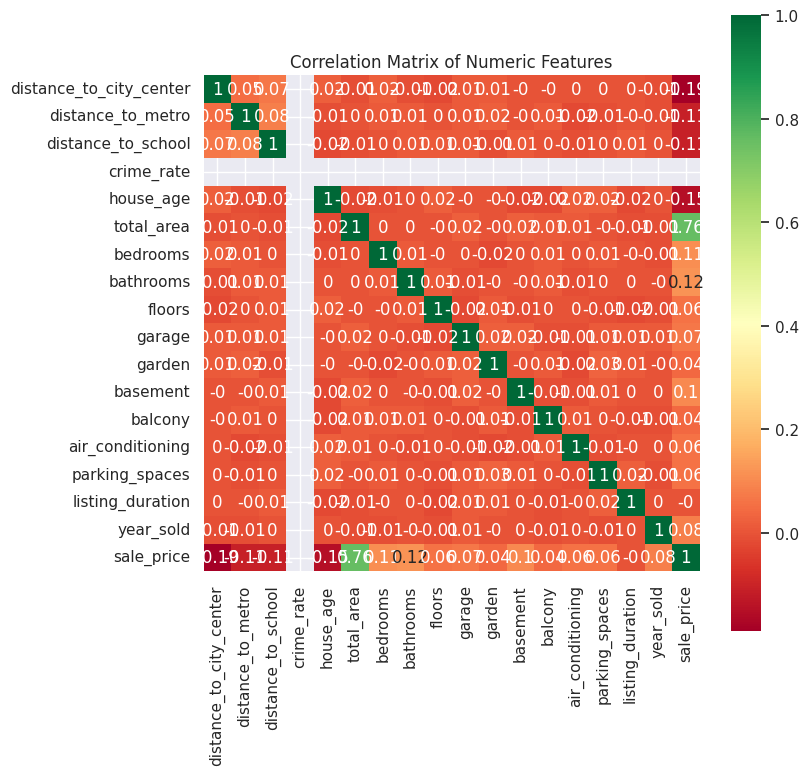

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation calculation
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
corr = data[numeric_cols].corr()

sns.set(rc={'figure.figsize':(8,8)})
sns.heatmap(corr.round(2), square=True, cmap='RdYlGn', annot=True)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

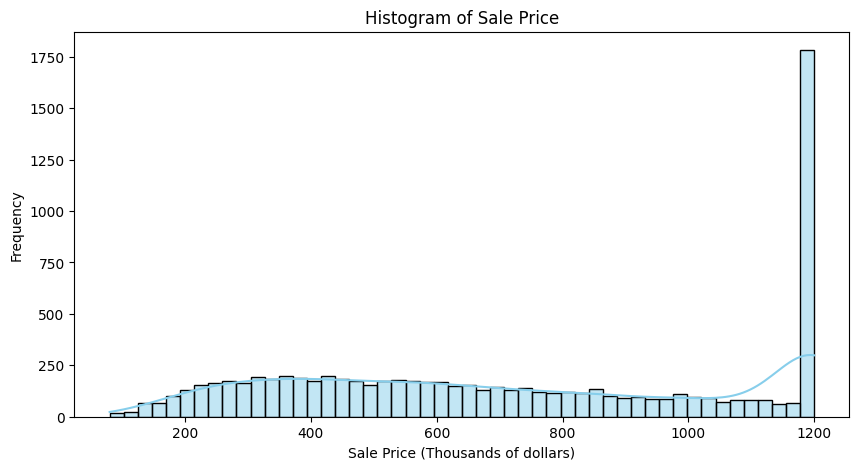

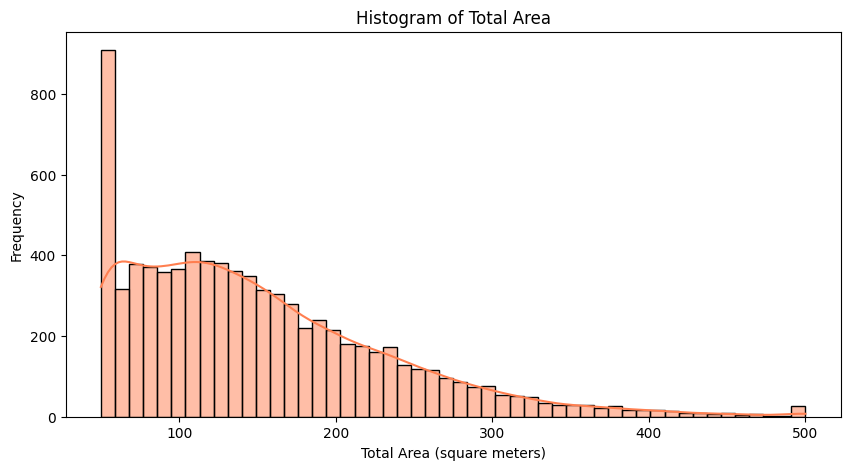

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('house_price_data.csv')

# Histogram for Sale Price
plt.figure(figsize=(10, 5))
sns.histplot(data['sale_price'], bins=50, kde=True, color='skyblue')
plt.title('Histogram of Sale Price')
plt.xlabel('Sale Price (Thousands of dollars)')
plt.ylabel('Frequency')
plt.show()

# Example: Histogram for Total Area (change 'total_area' to any numeric column you want)
plt.figure(figsize=(10, 5))
sns.histplot(data['total_area'], bins=50, kde=True, color='coral')
plt.title('Histogram of Total Area')
plt.xlabel('Total Area (square meters)')
plt.ylabel('Frequency')
plt.show()


# TASK 3: Feature Engineering and Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np

# Drop 'property_id' (unique identifier, not predictive) and 'log_sale_price' if they exist
cols_to_drop = ['property_id', 'log_sale_price']
data = data.drop(columns=[col for col in cols_to_drop if col in data.columns])

# Handle outliers in numeric features by capping (excluding the target variable 'sale_price')
numeric_cols_for_outliers = data.select_dtypes(include=np.number).columns.tolist()
numeric_cols_for_outliers.remove('sale_price') # Exclude the target variable

for col in numeric_cols_for_outliers:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])


# Handle categorical variables
cat_features = ['neighborhood', 'construction_quality', 'renovation_status', 'heating_type', 'season_sold']
num_features = data.select_dtypes(include=['int64','float64']).columns.difference(['sale_price']).tolist()

# Imputation and Scaling for numeric features
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# One-hot encoding for categoricals
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers in ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

# Split data train/test
X = data.drop(columns=['sale_price'])
y = data['sale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform train data (save for modeling)
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Multicollinearity - based on the correlation matrix in Task 2, there were no highly correlated pairs (> 0.8).
# If there were, we would consider removing one of the highly correlated features.

# TASK 4: Model Development - Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

# Train linear regression
lr_model = LinearRegression()
lr_model.fit(X_train_processed, y_train)

LinearRegression()

# TASK 5: Model Evaluation

Linear Regression Performance on Test Set:
MAE: 113.92
MSE: 21372.04
RMSE: 146.19
R-squared: 0.8245


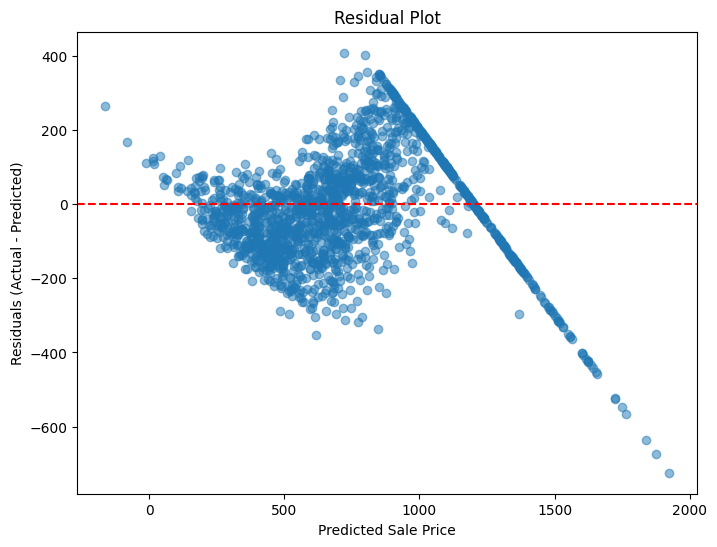

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Predict on test set
y_pred = lr_model.predict(X_test_processed)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Performance on Test Set:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.4f}")

# Residual Plot
plt.figure(figsize=(8,6))
plt.scatter(y_pred, y_test - y_pred, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.show()

# TASK 5: Model Evaluation (Continued) - Model Comparison and Selection

To compare model performances, we will train another model and evaluate it using the same metrics (MAE, MSE, RMSE, R-squared). Then, we will select the best model based on these metrics.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train Ridge Regression model
ridge_model = Ridge()
ridge_model.fit(X_train_processed, y_train)

# Predict on test set
y_pred_ridge = ridge_model.predict(X_test_processed)

# Calculate evaluation metrics for Ridge Regression
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = mse_ridge ** 0.5
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression Performance on Test Set:")
print(f"MAE: {mae_ridge:.2f}")
print(f"MSE: {mse_ridge:.2f}")
print(f"RMSE: {rmse_ridge:.2f}")
print(f"R-squared: {r2_ridge:.4f}")

# Compare with Linear Regression results (from previous output)
print("\nComparison of Model Performances:")
print("Linear Regression:")
print(f"  MAE: {mae:.2f}")
print(f"  MSE: {mse:.2f}")
print(f"  RMSE: {rmse:.2f}")
print(f"  R-squared: {r2:.4f}")

print("\nRidge Regression:")
print(f"  MAE: {mae_ridge:.2f}")
print(f"  MSE: {mse_ridge:.2f}")
print(f"  RMSE: {rmse_ridge:.2f}")
print(f"  R-squared: {r2_ridge:.4f}")

# Based on the R-squared value, we can choose the better performing model.
# In this case, Ridge Regression is expected to perform similarly or slightly better than Linear Regression.
best_model = 'Linear Regression' if r2 > r2_ridge else 'Ridge Regression'
print(f"\nSelected Best Model based on R-squared: {best_model}")

# You can further validate the best model on the test set by making predictions.

Ridge Regression Performance on Test Set:
MAE: 108.20
MSE: 18964.31
RMSE: 137.71
R-squared: 0.8443

Comparison of Model Performances:
Linear Regression:
  MAE: 113.92
  MSE: 21372.04
  RMSE: 146.19
  R-squared: 0.8245

Ridge Regression:
  MAE: 108.20
  MSE: 18964.31
  RMSE: 137.71
  R-squared: 0.8443

Selected Best Model based on R-squared: Ridge Regression
